# When and why did the Panama become an fiscal paradise? 
# What lessons can we remember of the Panama Papers affair in the future ?

Our goal in this project is to have a better understanding of the history of Panama throught the data of the Panama papers and try to find the reasons for an entity to create an offshore account in the Panama or any other fiscal paradise. This way the governments will have an idea why the richest people in the country hide money.

## Imports and preprocessing

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import warnings
import folium
import json
warnings.filterwarnings('ignore')

In [60]:
panama_entity = pd.read_csv('./Data/panama_papers.nodes.entity.csv')
## Convert feature:'n.incorporation_date' to type date
panama_entity['n.incorporation_date'] = pd.to_datetime(panama_entity['n.incorporation_date'])

panama_officer = pd.read_csv('./Data/panama_papers.nodes.officer.csv')

The following graphs helped us to understand the data. That our first step in this project.

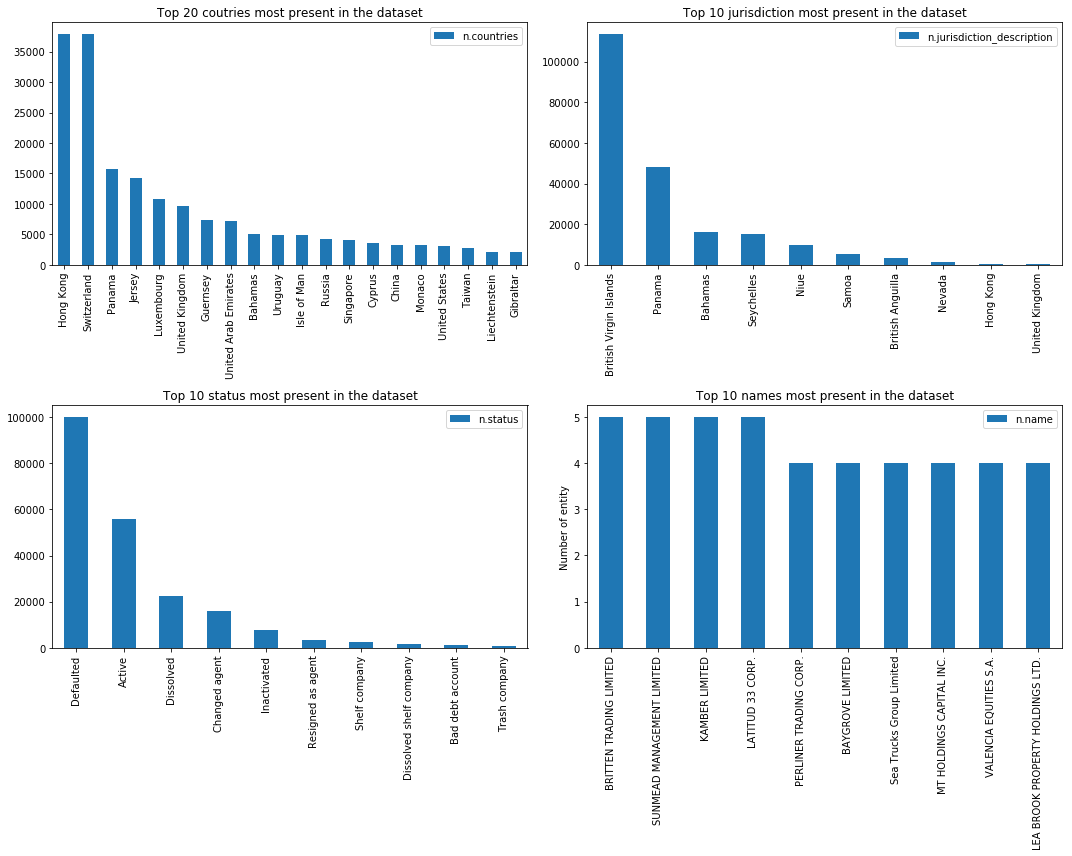

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

countries = pd.DataFrame(panama_entity['n.countries'].value_counts())
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0,0])
plt.ylabel('Number of entity')

jurisdiction = pd.DataFrame(panama_entity['n.jurisdiction_description'].value_counts())
jurisdiction[:10].plot(kind='bar',title='Top 10 jurisdiction most present in the dataset',ax=axes[0,1])
plt.ylabel('Number of entity')

status = pd.DataFrame(panama_entity['n.status'].value_counts())
status[:10].plot(kind='bar',title='Top 10 status most present in the dataset',ax=axes[1,0])
plt.ylabel('Number of entity')

names = pd.DataFrame(panama_entity['n.name'].value_counts())
names[:10].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[1,1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

# 1. History of Panama birth and death of a fiscal paradise.

Firt to be sure to be able to make an temporal analysis of the data, we must ensure that the date colum is clean and isn't empty most of the time.

In [28]:
panama_year = pd.DataFrame(panama_entity['n.incorporation_date'].dropna().dt.year.astype(int).value_counts())
print('{}% of the data has an date'.format(np.sum(panama_year['n.incorporation_date']) / panama_entity.shape[0]))

0.999836168400161% of the data has an date


Almost all the line has an incorporation so it seems reasonable to do the following analysis.

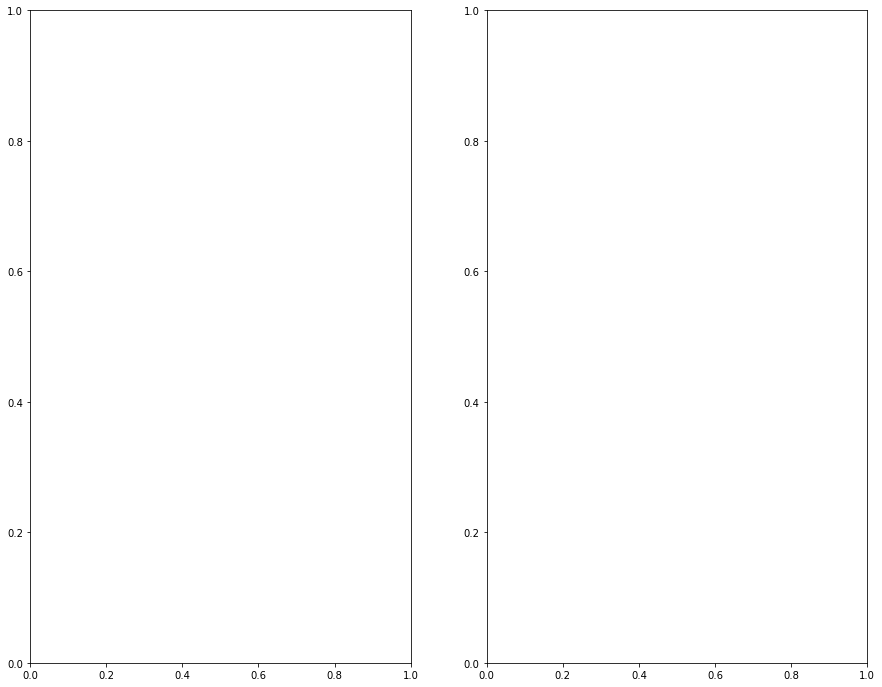

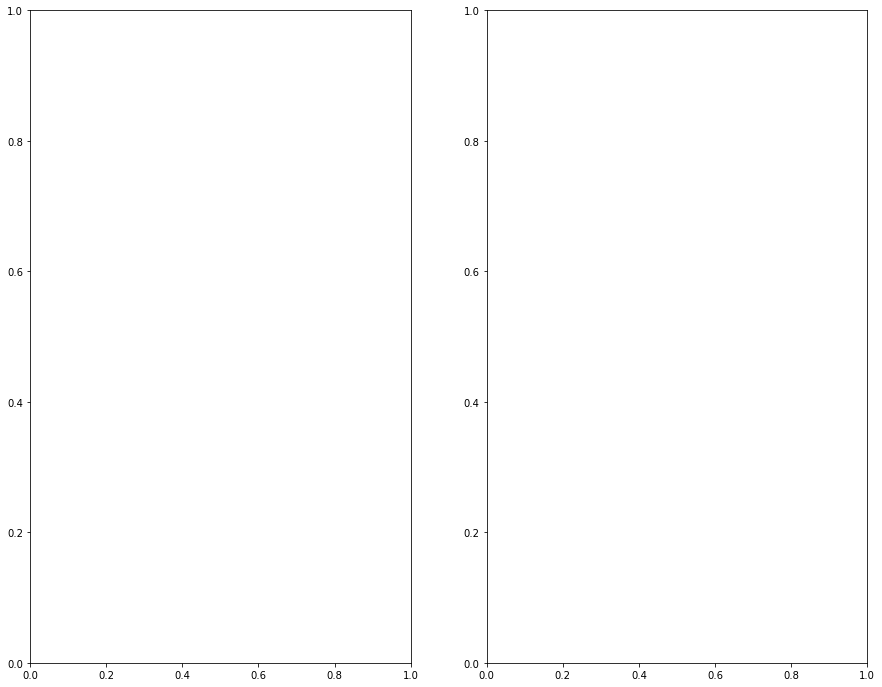

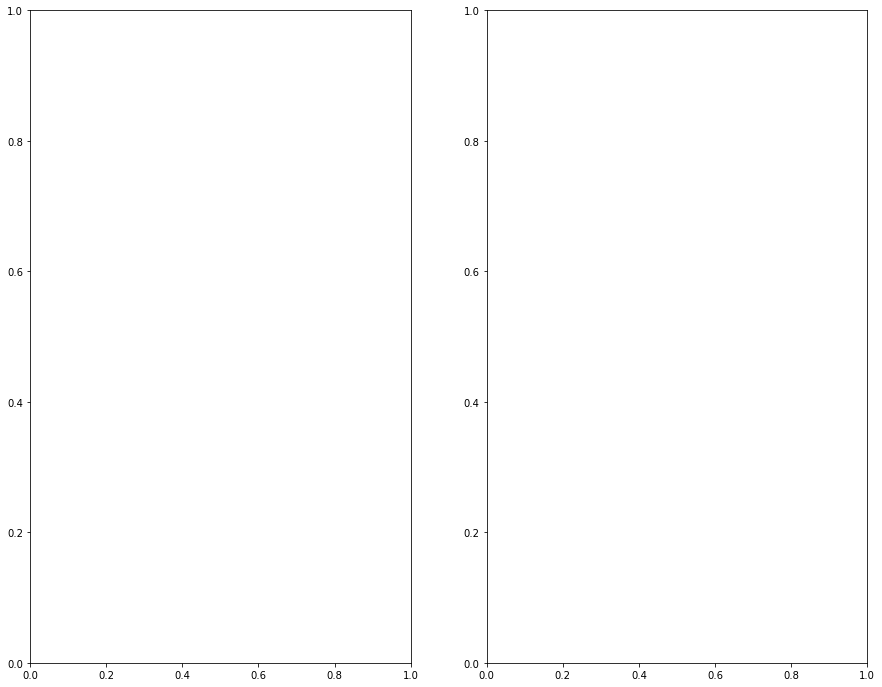

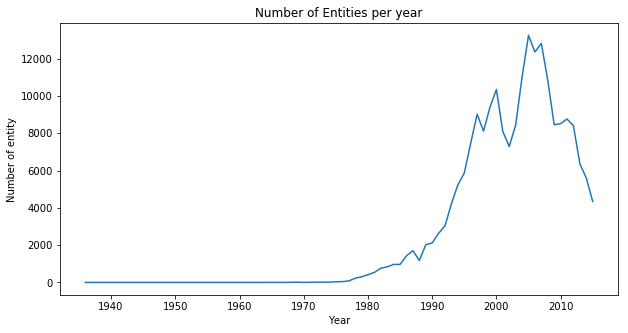

In [29]:
year = pd.DataFrame(panama_entity['n.incorporation_date'].dropna().dt.year.astype(int).value_counts())
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index())
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

As we can see the curve are sensitives to some historical events. Let's try to understand which one.

# 1935 - 1960 Before the financial secrecy
The coutry hadn't have almost any offshore's entites.

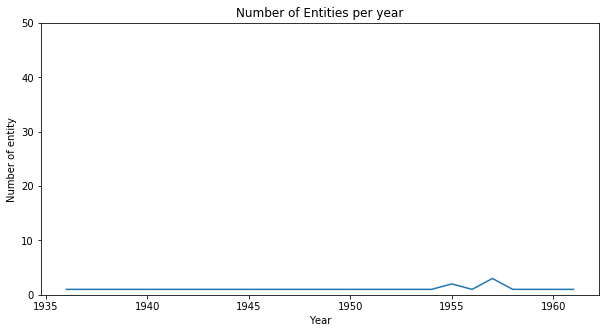

In [30]:
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index()[:10],)
axes = plt.gca()
axes.set_ylim([0,50])
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

# 1960-2000 The beginning of corporate and individual financial secrecy
The small decrease is due to the american invasion of the US invasion of panama

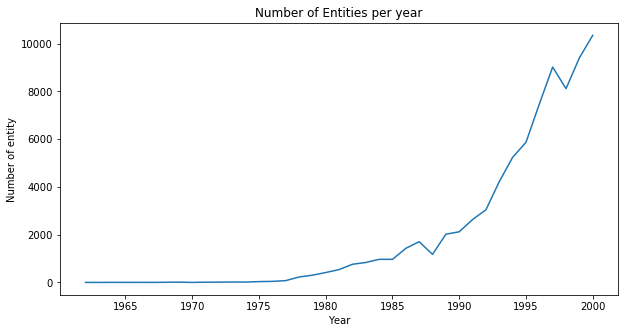

In [31]:
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index()[10:49])
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

# 2000-2005 The OECD report effect on Panama
On 2000 the panama is black listed by the OECD as a fiscal paradise. The effect of this listing is immediate and we saw a decrease of the account. The same effect appears in 2002 when the Panama the 2002 OECD Model Agreement on Exchange of Information on Tax Matters is written and published. The investments rise after probably because entities has found a way to break this rules. In 2004, this report has been incorporated in the UN Model Tax Convention, an other decrease occurs.

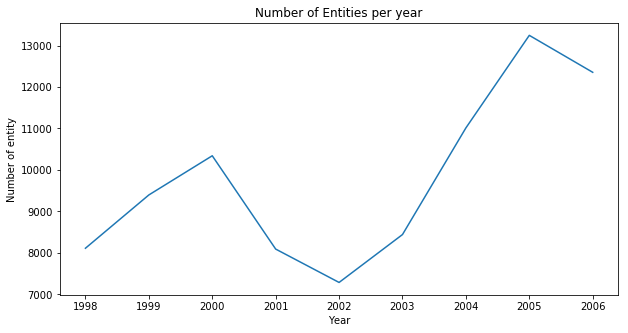

In [32]:
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index()[46:55])
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

# The subprime crisis
The crisis has a terrrible effect on the Panama and 4000 entity left the country

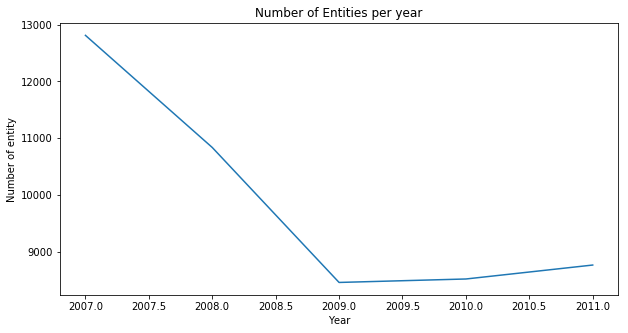

In [33]:
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index()[55:60])
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

# The after crisis and the Panama Paper's crisis
The number of entities continue to decrease and in 2015 the Panama papers are leaked and the world discovered it.

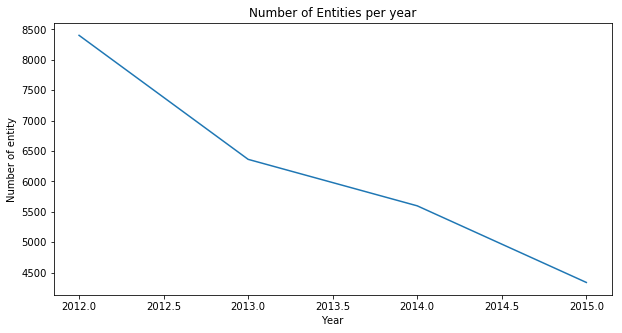

In [34]:
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index()[60:])
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

However it seem's odd for us to see the number of entities to decrease after the subprime crisis. Our first thought was that the number of accounts will increase after the crisis. We then decided to go deeper in the analysis of the entities.

In [35]:
evolution_feature_year = panama_entity[['n.incorporation_date','n.countries','n.jurisdiction_description','n.status']]
evolution_feature_year.dropna(subset = ['n.incorporation_date'], inplace=True)
evolution_feature_year['n.incorporation_date'] = evolution_feature_year['n.incorporation_date'].dt.year.astype(int)
evolution_feature_year['count'] = 1

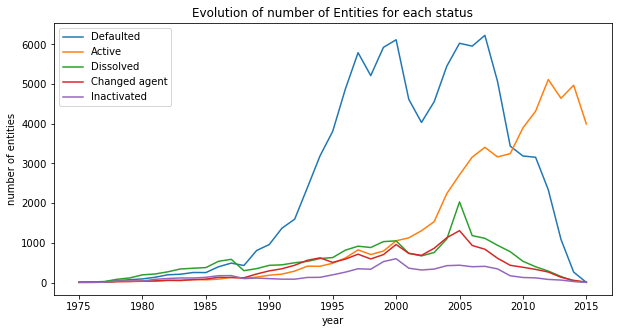

In [36]:
top5_status = status[:5].index.tolist()
status_year = evolution_feature_year[evolution_feature_year['n.status'].isin(top5_status)][['n.incorporation_date','n.status','count']]
status_year = status_year.groupby(['n.incorporation_date','n.status']).count().reset_index()

plt.figure(figsize=(10,5))
for st in top5_status:
    data = status_year[status_year['n.status']==st]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_status)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each status')
plt.show()

Our first thought was right. The number of entities has decreased but the number of 'Active' account has increased and the number of 'Defaulted' which 'indicate that the company chose not to renew a payment or otherwise missed a payment necessary to remain active on the country's corporate registry. It does not necessarily mean the company defaulted.' according to the original website. Our assumption is that some people try to hide money from their governments and other took back their money, probably because they needed it to save their company.

## Conclusion of the first part.

As we saw the action of the OECD and foreign governments has an impact on the number of entities in Panama. The action of this organism is benefic to the global economy. The subprime crisis reduce the numbers of entities but increase the number of active accounts in Panama. We may now integorate ourselves if the increasing number of accounts is due to a stronger tax policy in the home country of the entities ?

# 2. The reasons of abroad entities to come in Panama

To understand why entities are saving money in Panama, we gonna use this dataset: http://www.heritage.org/index.
It contains differenct factors to determine how free a country is. We'll use the 2013 which is the oldest dataset on the webiste. It will represent the world status at this time before the leak. Our assumption here is that many accounts without date are recent accounts from the 2-4 previous year before the leak.

First we have been searching where this money come from to have a better understanding of the situation. Here are some graphs explaining what we found.

In [68]:
world_map = folium.Map([20,0], tiles='cartodbpositron', zoom_start=2)


world_geo_path = r'./data/world_map.geojson'

entities_by_country = pd.DataFrame(countries['n.countries'])
entities_by_country.reset_index(inplace=True)
entities_by_country.columns = ['Country','count']

world_map.choropleth(geo_data=world_geo_path, data=entities_by_country,
             columns=['Country','count'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.5,
             highlight=True,
             legend_name='Number of entities')
world_map

This is a map of the world showing how many entities are listed by country. We wanted to see if a particular continent of the world is present in the dataset. The result is as you can see that appart the swiss no country or area are in dark red. To help us in the analysis we printed the top 20 countries in the dataset.

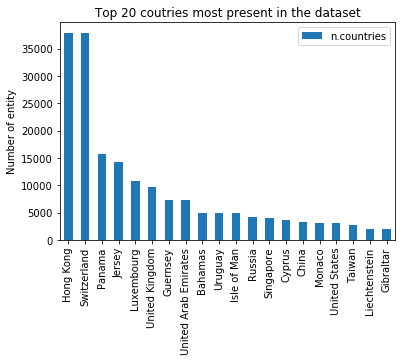

In [63]:
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset')
plt.ylabel('Number of entity')
plt.show()

Most of the most present country in the dataset are other fiscal paradise and very small country. This is the reason we don't see much colored country on the map. These fiscal paradise are used as a step in hiding money more efficiently. 

We now use the external dataset to have a better understanding of what makes people hide their money.

In [123]:
heritage_df = pd.read_excel('./Data/index2013_data.xls')
heritage_df = heritage_df.set_index(['Country Name'])
heritage_df = heritage_df[['Region','Unemployment (%)','Gov\'t Spending','Monetary Freedom','Trade Freedom','2013 Score']]
result = pd.merge(countries,heritage_df, left_index=True, right_index=True)

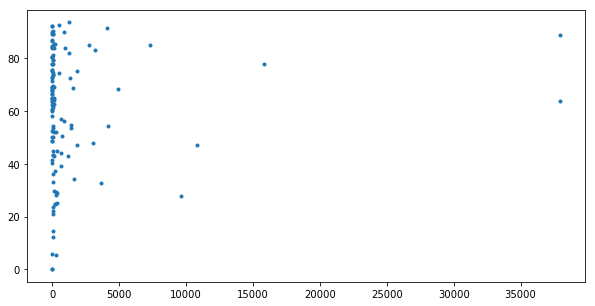

In [124]:
plt.figure(figsize=(10,5))
plt.plot(result['n.countries'],result['Gov\'t Spending'],'.')
plt.show()

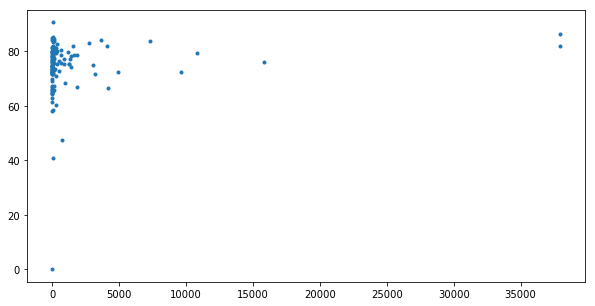

In [121]:
plt.figure(figsize=(10,5))
plt.plot(result['n.countries'],result['Monetary Freedom'],'.')
plt.show()

Most of the country doesn't seem to have entities because intermediaries have been used to hide money. A political analysis seems compromised then. To do so, we would the data of other countries like Hong Kong, Switzerland or Luxembourg. Let's use a concrete case to help us prove you that. 

## The case of Lionel Messi in the Panama Papers

Lionel Messi is accused by the spanish government to have an offshore company named 'Mega Star Enterprises'. Let's see what we know about this company in our dataset.

But first we need to merge the data. To keep this notebook as clean as possible we decided to create a .py script to merge the data and save it to the csv format.

Source:
http://www.lemonde.fr/panama-papers/article/2016/04/04/panama-papers-messi-assure-que-sa-societe-offshore-n-a-jamais-eu-de-fonds_4895590_4890278.html

In [129]:
#Loading the merge data.
merged_data = pd.read_csv('./Data/merged_data.csv')

In [134]:
#Searching Lionel Messi's company.
messi_data = merged_data[merged_data['n.name'] == 'MEGA STAR ENTERPRISES INC.']
messi_data

,Unnamed: 0,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
165906,165906,"[""Entity""]",The Panama Papers data is current through 2015,URY,Uruguay,10166484,Panama Papers,"BALMAREN S.A. RUTA 8 KM. 17,500 MONTEVIDEO URU...",MEGA STAR ENTERPRISES INC.,Panama,Mossack Fonseca,PMA,NaN,08-FEB-2012,10,NaN,Active,NaN,NaN


As we can see this company exist and the money comes from Uruguay. Beside this don't have any connections with Lionel Messi, we can't infer it's his property. To do so we would need data from Uruguay. This an example why such an analysis can't be made. Indeed Messi comes from Argentina and currently lives in Spain. None of this country are mentionned, so any results of this analysis would have been wrong. At best it can help us to determine if a country is fiscal paradise or not.